In [17]:
#! pip install numpy
#! pip install pandas
#! pip install matplotlib

In [18]:
import pandas as pd
import numpy as np

lr_df = pd.read_csv("lr_model_scores.csv")
nn_df = pd.read_csv("nn_model_scores.csv")
rf_df = pd.read_csv("rf_model_scores.csv")

scores_df = pd.concat([lr_df, nn_df, rf_df], axis=0, ignore_index=True)
scores_df

,Model,Accuracy,F1
0,log reg imbalanced,0.787671,0.031250
1,log reg undersampled,0.609589,0.393617
2,log reg undersampled weighted,0.708904,0.388489
3,log reg oversampled,0.630137,0.386364
4,log reg oversampled weighted,0.654110,0.380368
5,neural network imbalanced,0.784247,0.030769
6,neural network undersampled,0.582192,0.351064
7,neural network undersampled weighted,0.760274,0.375000
8,neural network oversampled,0.691781,0.437500
9,neural network oversampled weighted,0.729452,0.347107


In [19]:
import matplotlib.pyplot as plt

#plt.__version__

In [20]:
for x in range(0,15):
    old_name = scores_df.iat[x, 0]
    old_name = old_name.replace("imbalanced", "imbal")
    old_name = old_name.replace("undersampled", "undersam")
    old_name = old_name.replace("oversampled", "oversam")
    new_name = old_name.replace(" ", "\n")
    scores_df.iat[x,0] = new_name.title()
    
scores_df = scores_df.sort_values(by=["Accuracy"])

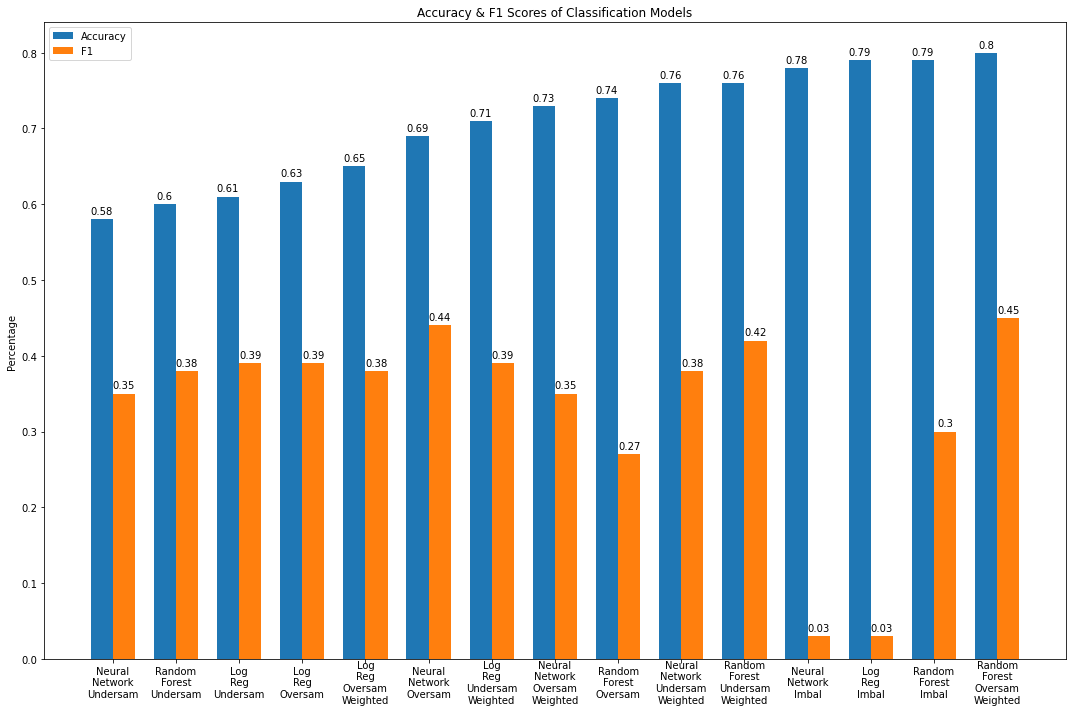

In [21]:
scores_df["Accuracy"] = scores_df["Accuracy"].map(lambda x: round(x, 2))
scores_df["F1"] = scores_df["F1"].map(lambda x: round(x, 2))

model_names = scores_df["Model"]
acc_scores = scores_df["Accuracy"]
f1_scores = scores_df["F1"]


x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
rects1 = ax.bar(x - width/2, acc_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
font = {
    'horizontalalignment':'center',
    'verticalalignment':'center',
    'rotation':'horizontal'
}
ax.set_ylabel('Percentage')
ax.set_title('Accuracy & F1 Scores of Classification Models')
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontdict=font)
ax.tick_params(axis='x', which='major', pad=20)
#ax.xaxis.labelpad = 2000
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


fig.tight_layout()

# plt.show()

In [22]:
#scores_df.query('Accuracy > .6 and F1 > .3')

